In [1]:
%matplotlib inline
import os
import numpy as np
import esmlab

import intake
import intake_esm
import ncar_jobqueue
from dask.distributed import Client

import utils
import climo_utils as cu
import ann_avg_utils as aau
units, _ = aau.get_pint_units()

%load_ext watermark
%watermark -a "Mike Levy" -d -iv -m -g -h

ncar_jobqueue 2019.10.16.1
numpy         1.17.3
esmlab        2019.4.27
intake        0.5.3
intake_esm    2019.12.13
Mike Levy 2020-02-20 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper20
Git hash   : 574779e9a54bf8039964952c3e77a2c22cfd18e7


In [2]:
cluster = ncar_jobqueue.NCARCluster(project='P93300606')
cluster.adapt(minimum_jobs=0, maximum_jobs=24)
client = Client(cluster)
client

Client Scheduler: tcp://128.117.181.226:36958 Dashboard: https://jupyterhub.ucar.edu/dav/user/mlevy/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
%%time

# Compute annual mean (weighted) from monthly data
# TODO: move this to generation notebook, create a second file?
catalog = intake.open_esm_datastore('/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/campaign-cesm2-cmip6-timeseries.json')

PFTs = ['sp', 'diat', 'diaz']
for n, PFT in enumerate(PFTs):
    # Read CESM and WOA data
    variable = f'{PFT}Chl'
    dq = catalog.search(experiment='historical', component='ocn', variable=variable).to_dataset_dict(cdf_kwargs={'chunks':{'time': 4}})
    ds_tmp = cu.read_CESM_var(dq, slice("1990-01-15", "2015-01-15"), variable, mean_dims='member_id').isel(z_t_150m=0) # 1990 - 2014, inclusive
    if n == 0:
        ds_surf = ds_tmp.rename({variable : 'totChl'})
    else:
        ds_surf['totChl'] = ds_surf['totChl'] + ds_tmp.rename({variable : 'totChl'})['totChl']
    del(ds_tmp)

ds_surf_avg = ds_surf.mean(dim='time')
da_surf_avg = ds_surf_avg['totChl']

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'
             
--> There are 1 group(s)


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:39863'], ('mean_agg-aggregate-de99f1f95d232660eedf1bf73fd1cffd', 43, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.12:44095'], ('mean_agg-aggregate-de99f1f95d232660eedf1bf73fd1cffd', 15, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.12:44095'], ('mean_agg-aggregate-de99f1f95d232660eedf1bf73fd1cffd', 12, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.12:44095'], ('mean_agg-aggregate-de99f1f95d232660eedf1bf73fd1cffd', 7, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.12:44095'], ('mean_agg-aggregate-de99f1f95d232660eedf1bf73fd1cffd', 63, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.12:44095'], ('mean_agg-

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'
             
--> There are 1 group(s)


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:44201'], ('mean_agg-aggregate-527a76bc64e6c8daa6d6fbac3368913a', 64, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:41619'], ('open_dataset-17aa4318253f12b080e0cd357a4e4007TLAT-7cd85b7200ddef3ab276909a8151cbfa', 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:45988'], ('mean_agg-aggregate-527a76bc64e6c8daa6d6fbac3368913a', 39, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:44201'], ('mean_agg-aggregate-527a76bc64e6c8daa6d6fbac3368913a', 71, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.16:43919'], ('mean_agg-aggregate-527a76bc64e6c8daa6d6fbac3368913a', 53, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.20

Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'
             
--> There are 1 group(s)


distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.13:33396'], ('mean_agg-aggregate-3b34890dc4108dbe10a335cbcb4b0953', 56, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.13:33396'], ('mean_agg-aggregate-3b34890dc4108dbe10a335cbcb4b0953', 4, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.23:44371'], ('mean_agg-aggregate-bbf334d173ce5ab792189b02422aff7e', 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.13:33396'], ('mean_agg-aggregate-3b34890dc4108dbe10a335cbcb4b0953', 3, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.13:33396'], ('mean_agg-aggregate-3b34890dc4108dbe10a335cbcb4b0953', 9, 0, 0, 0)
NoneType: None
distributed.scheduler - ERROR - Workers don't have promised key: ['tcp://10.12.205.13:33396'], ('mean_agg-aggreg

CPU times: user 43.1 s, sys: 1min 15s, total: 1min 59s
Wall time: 5min 13s


/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [4]:
ds_surf_obs = cu.read_obs(src='SeaWiFS', freq='ann')['chl_gsm'].to_dataset(name='totChl')

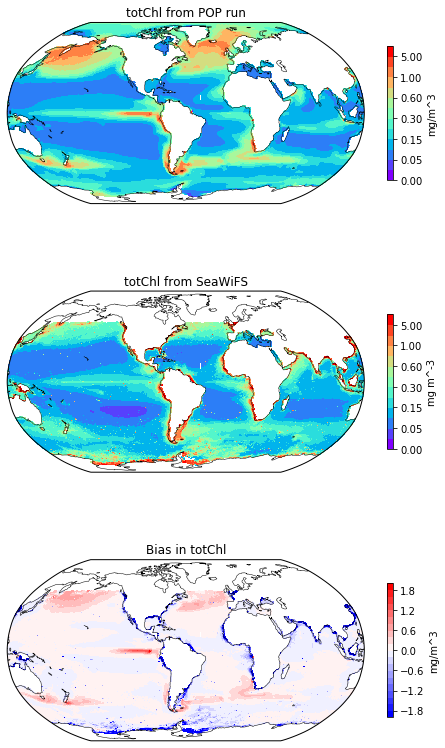

In [5]:
cu.plot_surface_vals('totChl', ds_surf_avg, da_surf_avg, ds_surf_obs['totChl'], obs_src='SeaWiFS',
                     levels=[0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.6, 0.8, 1, 2, 5, 20],
                     bias_levels=np.linspace(-2, 2, 21))

## Hovmöller plots for zonal means in Atlantic and Pacific

x-axis should be latitude, y axis should be time (`month`?)

In [6]:
ds_ann = ds_surf.drop(['dz', 'z_t']).groupby('time.month').mean()
ds_ann['month'].data = np.arange(12, dtype=np.int32)
ds_ann['month'].encoding['dtype'] = np.int32
ds_ann['month'].attrs['_FillValue'] = np.int32(-100)
ds_ann

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:      (month: 12, nlat: 384, nlon: 320)
Coordinates:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
  * month        (month) int32 0 1 2 3 4 5 6 7 8 9 10 11
Dimensions without coordinates: nlat, nlon
Data variables:
    TAREA        (month, nlat, nlon) float64 1.125e+13 1.125e+13 ... 7.432e+12
    REGION_MASK  (month, nlat, nlon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    totChl       (month, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    title:               b.e21.BHIST.f09_g17.CMIP6-historical.011
    history:             none
    calendar:            All years have exactly  365 days.
    source:              CCSM POP2, the CCSM Ocean Component
    intake_esm_varname:  spChl
    model_doi_url:       https://doi.org/10.5065/D67H1H0V
    revision:            $Id: tavg.F90 89644 2018-08-04 14:26:01Z klindsay $
    conten

In [7]:
ds_obs_ann = cu.read_obs(src='SeaWiFS', freq='monthly')['chl_gsm'].to_dataset(name='totChl')

# recast 'month' as integers to allow introduction of _FillValue
# (kludge for the zonal mean executable)
ds_obs_ann['month'].data = np.arange(12, dtype=np.int32)
ds_obs_ann['month'].encoding['dtype'] = np.int32
ds_obs_ann['month'].attrs['_FillValue'] = np.int32(-100)

In [8]:
kwargs = {'grid' : 'gx1v7'}
kwargs['rmask_file'] = os.path.join(os.path.sep,
                                    'glade',
                                    'p',
                                    'cgd',
                                    'oce',
                                    'people',
                                    'klindsay',
                                    'oldcgdoce',
                                    'REGION_MASK',
                                    'new_REGION_MASK_gx1v6.nc')
regions = dict()
regions['Pacific Ocean'] = 1
regions['Atlantic Ocean'] = 3

da_zonal_mean = utils.zonal_mean_via_fortran(ds_ann, 'totChl', **kwargs)
da_zonal_mean_obs = utils.zonal_mean_via_fortran(ds_obs_ann, 'totChl', **kwargs)

za ran successfully, writing netcdf output
za ran successfully, writing netcdf output


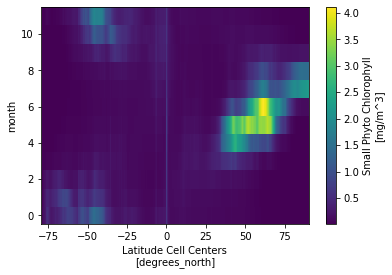

In [9]:
da_zonal_mean.isel(basins=regions['Atlantic Ocean']).totChl.plot()

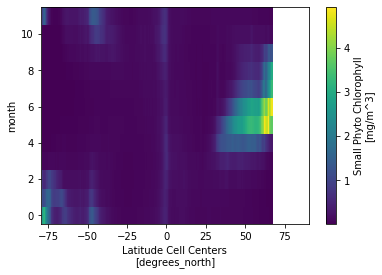

In [10]:
da_zonal_mean.isel(basins=regions['Pacific Ocean']).totChl.plot()

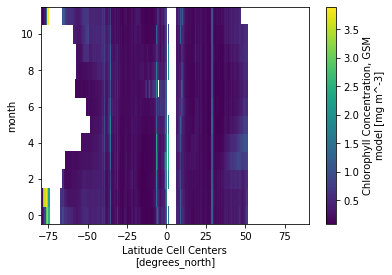

In [11]:
da_zonal_mean_obs.isel(basins=regions['Atlantic Ocean']).totChl.plot()

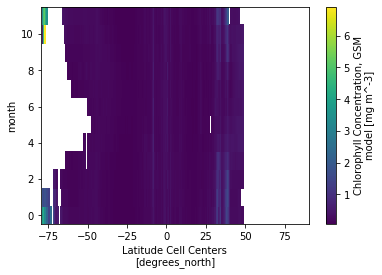

In [12]:
da_zonal_mean_obs.isel(basins=regions['Pacific Ocean']).totChl.plot()